# MODEL REGULARIZATION

<b>Optimization is basically divided into two. Removing the variables that cause multiple linear regression or are unnecessary in estimating the target variable. The estimation parameters of the feature variables are weighted according to their importance in estimating the target variable, and in this way, the complexity of the model is balanced between error due to the bias of the model and error due to its variance. The technique is called regularization.

<b>The first of the mentioned regularization techniques is L1 and the second is L2.

# 1-) Lasso Regression

<b>The process of regularization the weights of the features towards zero using Lasso L1 regularization is called penalization or shrinkage.

# Cost Function
# $RSS = \sum_{j=1}^{n}(y_{j} - \hat{y}_{j})^{2}$
<b> n : number of observations

# Penalty Term
# $L1\sum_{j=1}^{p}\left| \beta _{j}\right|$
<b> p : number of features

# Lasso L1 regulation cost function
# $RSS_{LASSO} = \sum_{j=1}^{n}(y_{j} - \hat{y}_{j})^{2}+L1\sum_{j=1}^{p}\left| \beta _{j}\right|$

In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [4]:
df = pd.read_csv(r'D:\githubProjects\Machine-Learning\Supervised Learning\Model Regularization\real_estate')
df.head()

,Unnamed: 0,price,rooms,m2,floor,age
0,0,475,1,40,0,6
1,1,475,1,55,0,5
2,2,450,1,50,0,7
3,3,450,1,55,1,6
4,4,475,1,45,2,7


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.shape

(191, 5)

<b>HOLD-OUT

In [6]:
X = df.drop('price',axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

<b> Lasso Model

In [7]:
lasso = Lasso(random_state=42)
lasso.fit(X_train,y_train)

Lasso(random_state=42)

In [8]:
train_score = lasso.score(X_train,y_train)
test_score = lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [9]:
print('Train R2 :',train_score)
print('Test R2 :',test_score)
print('Number of features with a weight greater than zero :',coeff_used)

Train R2 : 0.7324650909211012
Test R2 : 0.6862906745619393
Number of features with a weight greater than zero : 4


<b>The alpha parameter was used as 1. Now let's look at the model performance for different alpha values.

<b>alpha = 0.01

In [10]:
lasso001 = Lasso(alpha=0.01,random_state=42,max_iter=1000000)
lasso001.fit(X_train,y_train)

train_score001 = lasso001.score(X_train,y_train)
test_score001 = lasso001.score(X_test,y_test)

coeff_used001 = np.sum(lasso001.coef_ !=0)

print('Train R2 (alpha = 0.01) :',train_score001)
print('Test R2 (alpha = 0.01) :',test_score001)
print('Number of features with a weight greater than zero (alpha = 0.01) :',coeff_used001)

Train R2 (alpha = 0.01) : 0.7337398316689663
Test R2 (alpha = 0.01) : 0.6986142688656938
Number of features with a weight greater than zero (alpha = 0.01) : 4


<b>alpha = 0.001

In [11]:
lasso00001 = Lasso(alpha=0.0001,random_state=42,max_iter=1000000)
lasso00001.fit(X_train,y_train)

train_score00001 = lasso00001.score(X_train,y_train)
test_score00001 = lasso00001.score(X_test,y_test)

coeff_used00001 = np.sum(lasso00001.coef_ !=0)

print('Train R2 (alpha = 0.001) :',train_score00001)
print('Test R2 (alpha = 0.001) :',test_score00001)
print('Number of features with a weight greater than zero (alpha = 0.001) :',coeff_used00001)

Train R2 (alpha = 0.001) : 0.7337399616438325
Test R2 (alpha = 0.001) : 0.6987270960928149
Number of features with a weight greater than zero (alpha = 0.001) : 4


<b>Comparing the results with multiple linear regression

In [12]:
lr = LinearRegression().fit(X_train,y_train)
lr_train_score = lr.score(X_train,y_train)
lr_test_score = lr.score(X_test,y_test)

print('Train R2 :',lr_train_score)
print('Test R2 :',lr_test_score)

Train R2 : 0.733739961656849
Test R2 : 0.6987282352837991


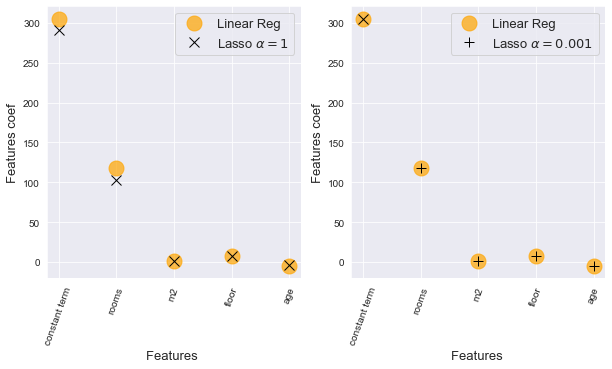

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

plt.plot((1,2,3,4),lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=15,color='orange',label='Linear Reg',zorder=2)

plt.plot((1,2,3,4),lasso.coef_,alpha=1,linestyle='none',marker='x',markersize=10,color='black',label=r'Lasso $ \alpha = 1$',zorder=7)

plt.plot(0,lr.intercept_,alpha=0.7,linestyle='none',marker='o',markersize=15,color='orange')

plt.plot(0,lasso.intercept_,alpha=1,linestyle='none',marker='x',markersize=10,color='black')

plt.xticks([0,1,2,3,4],('constant term','rooms','m2','floor','age'),rotation='70')

plt.xlabel('Features ',fontsize=13)

plt.ylabel('Features coef',fontsize=13)

plt.legend(fontsize=13,loc='upper right')

plt.subplot(1,2,2)

plt.plot((1,2,3,4),lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=15,color='orange',label='Linear Reg',zorder=2)

plt.plot((1,2,3,4),lasso00001.coef_,alpha=1,linestyle='none',marker='+',markersize=10,color='black',label=r'Lasso $ \alpha = 0.001$')

plt.plot(0,lr.intercept_,alpha=0.7,linestyle='none',marker='o',markersize=15,color='orange')

plt.plot(0,lasso00001.intercept_,alpha=1,linestyle='none',marker='x',markersize=10,color='black')

plt.xticks([0,1,2,3,4],('constant term','rooms','m2','floor','age'),rotation='70')

plt.xlabel('Features ',fontsize=13)

plt.ylabel('Features coef',fontsize=13)
plt.legend(fontsize=13,loc='upper right')

plt.show()

<b>As the alpha value approaches zero, the estimation parameters of the model created with Lasso approach the estimation parameters of the multiple linear regression. As the L1 penalty coefficient increases, the narrowing in some parameter coefficients becomes visible.

In [14]:
lasso.coef_

array([103.4072838 ,   1.61924751,   7.08642243,  -4.05517555])

In [15]:
lasso00001.coef_

array([118.34915944,   1.13314119,   7.09688539,  -4.66564465])

In [16]:
lr.coef_

array([118.35066956,   1.13309207,   7.09688622,  -4.66570638])

# 2-)Ridge Regression

<b>The Ridge algorithm, on the other hand, aims to reduce the cost of the model by applying the L2 regularization technique. While estimating the feature coefficients, it weights the features according to their importance in estimating the target variable, as in Lasso/L1.It does not exclude any feature.

# $RSS_{RIDGE}=\sum_{j=1}^{n}(y_{j}-\hat{y}_{j})^{2} + L2\sum_{j=1}^{p}\left ( \beta _{j} \right )^2$

<b>Linear Model

In [18]:
lr= LinearRegression().fit(X_train,y_train)

<b>Ridge Model

In [21]:
rr = Ridge(alpha=0.01,random_state=42).fit(X_train,y_train)   # L2 = alpha = 0.01

rr100 =Ridge(alpha=100,random_state=42).fit(X_train,y_train)  # L2 = alpha = 100

In [22]:
train_score = lr.score(X_train,y_train)
test_score = lr.score(X_test,y_test)

<b>alpha = 0.01 Ridge R2

In [23]:
ridge_train_score = rr.score(X_train,y_train)
ridge_test_score = rr.score(X_test,y_test)